<a href="https://colab.research.google.com/github/valki45/inteligencia-artificial/blob/main/CNN/digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_digits  # Importa la función 'load_digits' del módulo 'datasets' de sklearn,
                                           # que contiene un conjunto de datos con imágenes de dígitos escritos a mano.

digits = load_digits()  # Carga el conjunto de datos de los dígitos y lo guarda en la variable 'digits'.
                        # Este dataset incluye imágenes de números del 0 al 9 y sus etiquetas correspondientes.



In [3]:
digits.keys()  # Muestra las claves del conjunto de datos 'digits'.


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)  # Muestra la descripción del dataset 'digits'.


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
index = 0  # Define el índice inicial en 0.


In [6]:
image = digits.images[index]  # Guarda la imagen del dígito en la posición indicada.
label = digits.target[index]  # Guarda la etiqueta (número real) de esa imagen.


In [7]:
print(image)  # Muestra la matriz de píxeles de la imagen seleccionada.


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


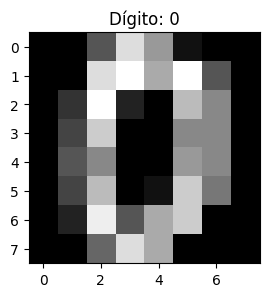

In [8]:
import matplotlib.pyplot as plt  # Importa la librería para crear gráficos.

plt.figure(figsize=(3, 3))  # Crea una figura de tamaño 3x3.
plt.imshow(image, cmap=plt.cm.gray)  # Muestra la imagen en escala de grises.
plt.title(f'Dígito: {label}')  # Agrega el título con el número del dígito.
plt.show()  # Muestra la imagen en pantalla.


In [9]:
import tensorflow as tf  # Importa TensorFlow para crear y entrenar redes neuronales.
from sklearn.model_selection import train_test_split  # Sirve para dividir los datos en entrenamiento y prueba.
from tensorflow.keras.utils import to_categorical  # Convierte las etiquetas a formato one-hot.

X_train, X_test, y_train, y_test = train_test_split(  # Divide el dataset en 80% entrenamiento y 20% prueba.
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

y_train = to_categorical(y_train, num_classes=10)  # Convierte las etiquetas de entrenamiento a one-hot.
y_test = to_categorical(y_test, num_classes=10)  # Convierte las etiquetas de prueba a one-hot.


In [10]:
import tensorflow as tf  # Importa TensorFlow para trabajar con redes neuronales.
from sklearn.model_selection import train_test_split  # Permite dividir los datos en conjuntos de entrenamiento y prueba.
from tensorflow.keras.utils import to_categorical  # Convierte las etiquetas en formato one-hot.

X_train, X_test, y_train, y_test = train_test_split(  # Separa los datos: 80% para entrenar y 20% para probar.
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

y_train = to_categorical(y_train, num_classes=10)  # Convierte las etiquetas de entrenamiento a formato one-hot.
y_test = to_categorical(y_test, num_classes=10)  # Convierte las etiquetas de prueba a formato one-hot.


In [11]:
print(X_train.shape)  # Muestra las dimensiones del conjunto de entrenamiento.
print(X_test.shape)   # Muestra las dimensiones del conjunto de prueba.


(1437, 64)
(360, 64)


In [12]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))  # Cambia la forma del primer dato a una matriz de 8x8.
print(reshaped_tensor)  # Muestra la matriz resultante.


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Importa herramientas para normalizar los datos.

scaler = StandardScaler()  # Crea un objeto para estandarizar los datos (media=0, desviación estándar=1).
X_train = scaler.fit_transform(X_train)  # Ajusta y transforma los datos de entrenamiento.
X_test = scaler.transform(X_test)  # Transforma los datos de prueba con el mismo ajuste.


In [14]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))  # Convierte el primer dato en una matriz de 8x8.
reshaped_tensor = tf.floor(reshaped_tensor * 100) / 100  # Redondea los valores a dos decimales para mejor visualización.
print(reshaped_tensor)  # Muestra la matriz resultante.


tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [15]:
# Redimensiona los datos a matrices de 8x8 para cada muestra
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))  # Ajusta el conjunto de entrenamiento.
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))  # Ajusta el conjunto de prueba.


In [16]:
from tensorflow.keras.models import Sequential  # Permite crear modelos secuenciales capa por capa.
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D  # Importa las capas necesarias para la CNN.

# Crea el modelo de red neuronal convolucional (CNN)
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),  # Capa convolucional con 32 filtros de tamaño 3x3.
        activation='relu',
        input_shape=(8, 8, 1)  # Tamaño de entrada: imágenes de 8x8 con 1 canal (escala de grises).
    ),
    MaxPooling2D(pool_size=(2, 2)),  # Reduce la dimensión con una ventana de 2x2.
    Flatten(),  # Convierte la matriz 2D en un vector 1D.
    Dense(128, activation='relu'),  # Capa totalmente conectada con 128 neuronas y activación ReLU.
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por cada dígito) y activación softmax.
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
from tensorflow.keras.optimizers import Adam  # Importa el optimizador Adam.

learning_rate = 0.001  # Define la tasa de aprendizaje.
adam_optimizer = Adam(learning_rate=learning_rate)  # Crea el optimizador Adam con esa tasa.


In [18]:
model.compile(  # Configura el modelo antes del entrenamiento.
    optimizer='adam',  # Usa el optimizador Adam.
    loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase.
    metrics=['accuracy']  # Mide la precisión durante el entrenamiento.
)


In [20]:
history = model.fit(  # Entrena el modelo con los datos de entrenamiento.
    X_train, y_train,
    epochs=10,  # Número de veces que el modelo verá todos los datos.
    batch_size=32,  # Cantidad de muestras que se procesan antes de actualizar los pesos.
    validation_split=0.2  # Usa el 20% de los datos para validación.
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9961 - loss: 0.0252 - val_accuracy: 0.9757 - val_loss: 0.1124
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9990 - loss: 0.0219 - val_accuracy: 0.9757 - val_loss: 0.1175
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9958 - loss: 0.0204 - val_accuracy: 0.9826 - val_loss: 0.0974
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9957 - loss: 0.0187 - val_accuracy: 0.9722 - val_loss: 0.0950
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9980 - loss: 0.0171 - val_accuracy: 0.9757 - val_loss: 0.0877
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9986 - loss: 0.0104 - val_accuracy: 0.9792 - val_loss: 0.0969
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9977 - loss: 0.0119 - val_accuracy: 0.9792 - val_loss: 0.0967
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.9861 - val_

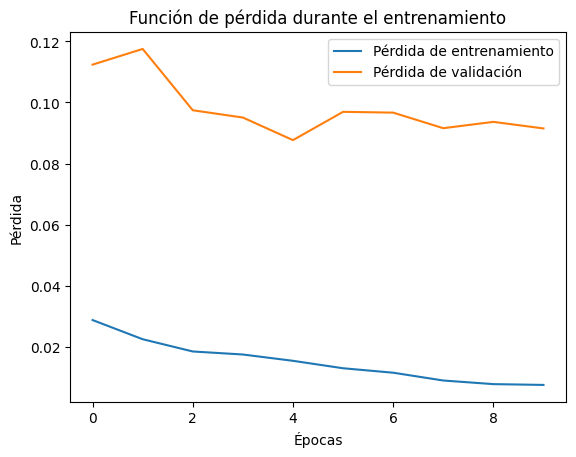

In [21]:
import matplotlib.pyplot as plt  # Importa la librería para graficar.

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')  # Grafica la pérdida del entrenamiento.
plt.plot(history.history['val_loss'], label='Pérdida de validación')  # Grafica la pérdida de validación.
plt.xlabel('Épocas')  # Etiqueta del eje X.
plt.ylabel('Pérdida')  # Etiqueta del eje Y.
plt.legend()  # Muestra las etiquetas de las líneas.
plt.title('Función de pérdida durante el entrenamiento')  # Título de la gráfica.
plt.show()  # Muestra la gráfica.


In [22]:
loss, accuracy = model.evaluate(X_test, y_test)  # Evalúa el modelo con los datos de prueba.
print(f'Loss: {loss}, Accuracy: {accuracy}')  # Muestra la pérdida y la precisión obtenidas.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9915 - loss: 0.0314  
Loss: 0.04112790524959564, Accuracy: 0.9833333492279053


In [23]:
import numpy as np  # Importa NumPy para manejar arreglos numéricos.
from sklearn.metrics import confusion_matrix, recall_score  # Importa funciones para evaluar el modelo.

y_pred = model.predict(X_test)  # Genera las predicciones del modelo.
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en clases predichas.
y_test_classes = np.argmax(y_test, axis=1)  # Convierte las etiquetas reales a formato de clase.

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)  # Calcula la matriz de confusión.
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)  # Calcula la sensibilidad por clase.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


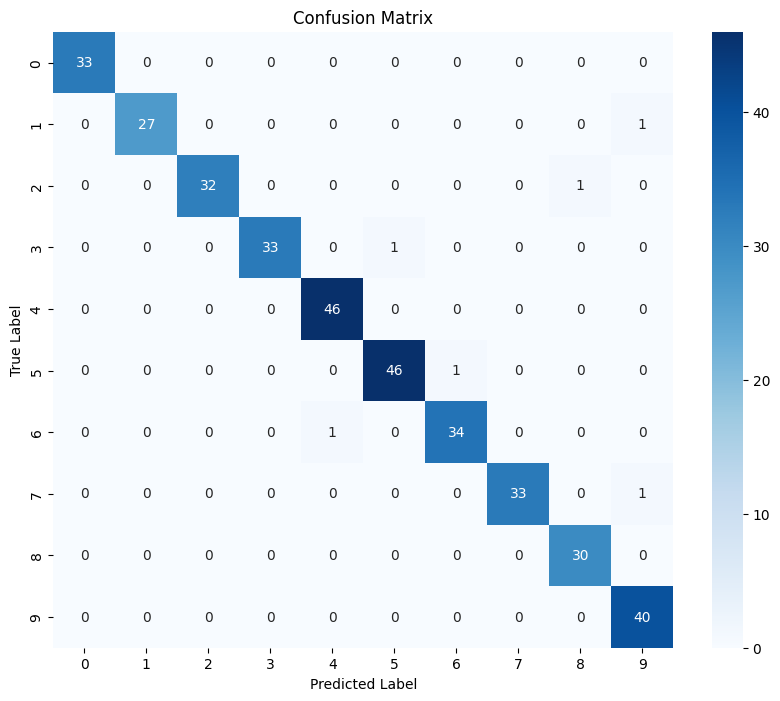

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9642857142857143
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 1.0


In [24]:
import seaborn as sns  # Importa Seaborn para crear mapas de calor.
import matplotlib.pyplot as plt  # Librería para graficar.

plt.figure(figsize=(10, 8))  # Define el tamaño de la figura.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Muestra la matriz de confusión en un mapa de calor.
plt.xlabel('Predicted Label')  # Etiqueta del eje X.
plt.ylabel('True Label')  # Etiqueta del eje Y.
plt.title('Confusion Matrix')  # Título de la gráfica.
plt.show()  # Muestra la gráfica.

print('Sensitivity (Recall) for each class:')  # Encabezado para los valores de sensibilidad.
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')  # Imprime la sensibilidad de cada clase.


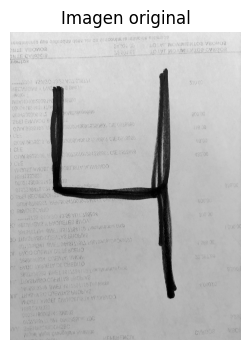

In [35]:
from PIL import Image  # Permite abrir y procesar imágenes.
import matplotlib.pyplot as plt  # Se usa para mostrar la imagen.

ruta = "/content/mi_numero.png"  # Ruta del archivo de imagen.
img = Image.open(ruta).convert("L")  # Abre la imagen y la convierte a escala de grises.

plt.figure(figsize=(4, 4))  # Define el tamaño de la figura.
plt.imshow(img, cmap="gray")  # Muestra la imagen en tonos grises.
plt.title("Imagen original")  # Agrega un título a la imagen.
plt.axis("off")  # Oculta los ejes.
plt.show()  # Muestra la imagen en pantalla.


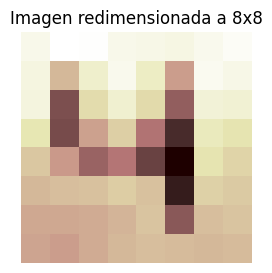

In [36]:
import matplotlib.pyplot as plt  # Librería para mostrar gráficos e imágenes.

img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)  # Redimensiona la imagen a 8x8 píxeles con buena calidad.

plt.figure(figsize=(3, 3))  # Define el tamaño de la figura.
plt.imshow(img_resized, cmap="pink")  # Muestra la imagen con un mapa de color rosado.
plt.title("Imagen redimensionada a 8x8")  # Título de la imagen.
plt.axis("off")  # Oculta los ejes.
plt.show()  # Muestra la imagen en pantalla.

img_resized.save("imagen_8x8.png")  # Guarda la imagen redimensionada (opcional).


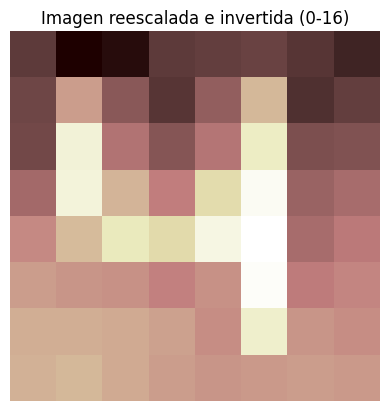

In [37]:
import matplotlib.pyplot as plt  # Librería para graficar.
import numpy as np  # Se usa para manejar arreglos numéricos.

img_array = np.array(img_resized).astype("float32")  # Convierte la imagen en un arreglo de tipo float.
img_array = 16 - (img_array / 255 * 16)  # Reescala los valores de 0-255 a 0-16 e invierte los tonos.

plt.imshow(img_array, cmap="pink")  # Muestra la imagen con el mapa de color rosado.
plt.title("Imagen reescalada e invertida (0-16)")  # Título de la imagen.
plt.axis("off")  # Oculta los ejes.
plt.show()  # Muestra la imagen.


In [38]:
from sklearn.preprocessing import StandardScaler  # Importa el método para normalizar los datos.

scaler = StandardScaler()  # Crea el objeto para escalar los valores.
img_flat = img_array  # Asigna la imagen reescalada a una nueva variable.
img_scaled = scaler.fit_transform(img_flat)  # Normaliza los valores de la imagen.

img_tensor = img_scaled.reshape(1, 8, 8)  # Redimensiona la imagen al formato que requiere el modelo.


In [39]:
pred = model.predict(img_tensor)  # Genera la predicción del modelo para la imagen.
digit = np.argmax(pred)  # Obtiene la clase con mayor probabilidad (el dígito predicho).
print("Predicción:", digit)  # Muestra el número que el modelo predice.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicción: 4
